Question 1: Understanding the Dataset 
<br>
Description: Load a dataset and understand its basic properties including data types dimensions, and first few rows

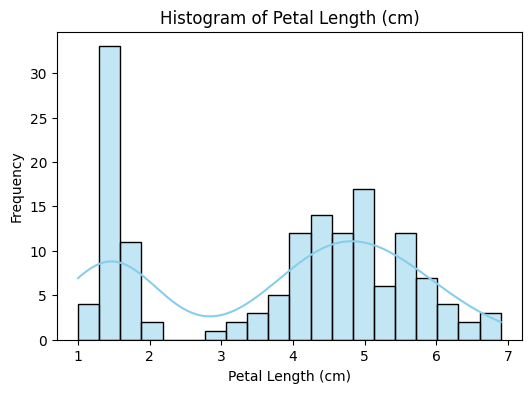

In [1]:
# Write your code from here
# Plot a histogram of the petal length feature

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

plt.figure(figsize=(6, 4))
sns.histplot(df['petal length (cm)'], bins=20, color='skyblue', kde=True)
plt.title('Histogram of Petal Length (cm)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()


Question 2: Checking for Missing Values
<br>
Description: Identify missing values in the dataset.

In [2]:
# Identify missing values in the dataset

# Check for missing values in each column
missing_counts = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values in each column:")
print(missing_counts[missing_counts > 0] if missing_counts.sum() > 0 else "No missing values found.")

Missing values in each column:
No missing values found.


Question 3: Descriptive Statistics
<br>
Description: Calculate descriptive statistics for numerical columns.

In [3]:
# Calculate descriptive statistics for numerical columns

# Use describe() to get statistics like mean, std, min, max, and quartiles
desc_stats = df.describe()
print("Descriptive statistics for numerical columns:")
print(desc_stats)

Descriptive statistics for numerical columns:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Question 4: Handling Outliers
<br>
Description: Identify outliers in numerical columns using box plots.

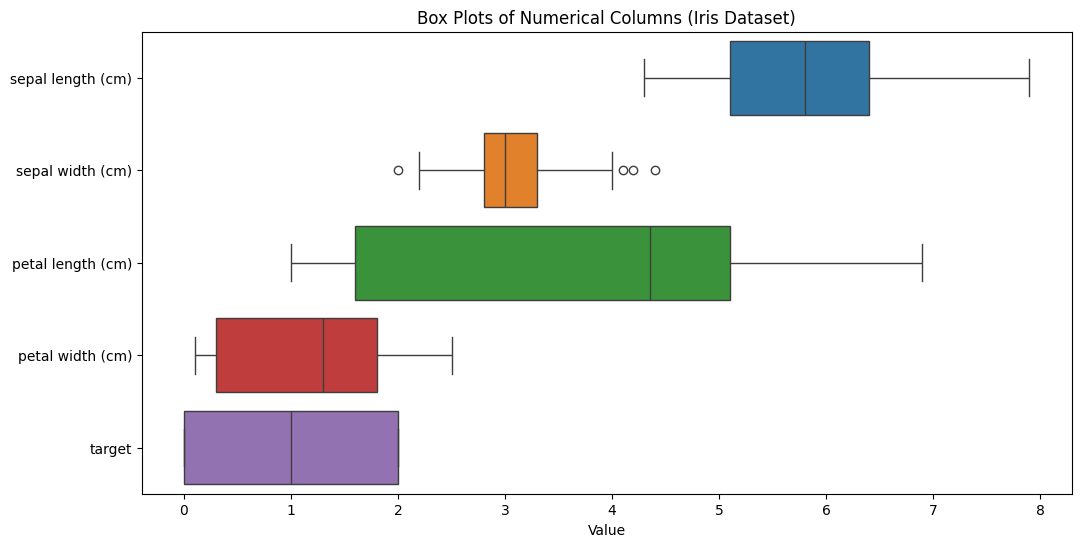

In [4]:
# Identify outliers in numerical columns using box plots

import matplotlib.pyplot as plt
import seaborn as sns

# Plot box plots for all numerical columns in the Iris dataset
numerical_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title('Box Plots of Numerical Columns (Iris Dataset)')
plt.xlabel('Value')
plt.show()

# Outliers are shown as points outside the whiskers in each box plot.


Question 5: Categorical Data Analysis
<br>
Description: Explore the counts of categorical variables.

Counts of each species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


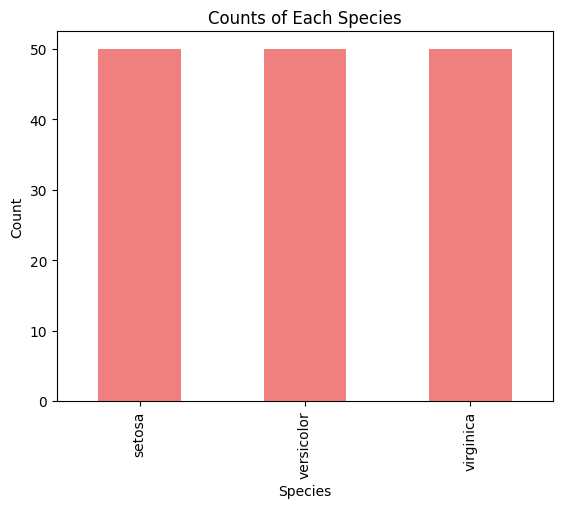

In [5]:
# Explore the counts of categorical variables in the Iris dataset

# The Iris dataset's categorical variable is 'target' (species)
# Map target numbers to species names for clarity
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Count occurrences of each species
species_counts = df['species'].value_counts()
print("Counts of each species:")
print(species_counts)

# Visualize the counts with a bar plot
import matplotlib.pyplot as plt
species_counts.plot(kind='bar', color='lightcoral')
plt.title('Counts of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

Question 6: Data Transformation
<br>
Description: Transform a categorical column into numerical using Label Encoding.

In [6]:
# Transform a categorical column into numerical using Label Encoding

from sklearn.preprocessing import LabelEncoder

# Example: Encode the 'species' column
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])

print("Label encoded values for 'species':")
print(df[['species', 'species_encoded']].head())

Label encoded values for 'species':
  species  species_encoded
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


Question 7: Visualizing Data Distributions
<br>
Description: Plot histograms for numerical columns to understand distributions.

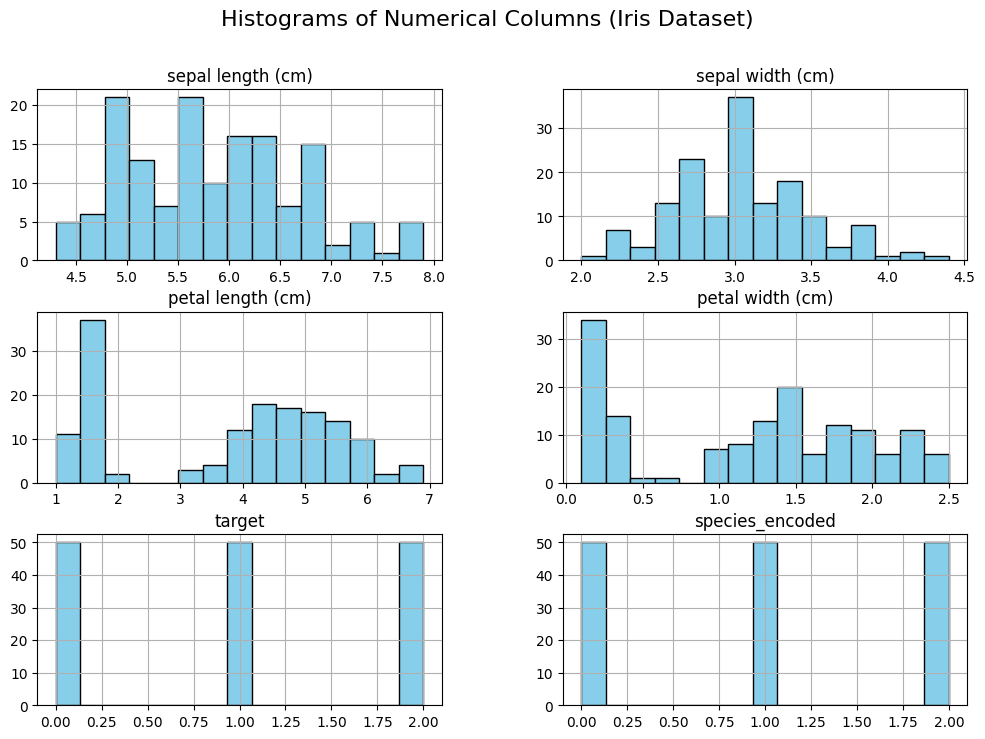

In [7]:
# Plot histograms for all numerical columns to understand distributions

import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include='number').columns

df[numerical_cols].hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns (Iris Dataset)', fontsize=16)
plt.show()

Question 8: Correlation Analysis
<br>
Description: Calculate and visualize the correlation matrix for numerical features.

Correlation matrix:
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
target                      0.782561         -0.426658           0.949035   
species_encoded             0.782561         -0.426658           0.949035   

                   petal width (cm)    target  species_encoded  
sepal length (cm)          0.817941  0.782561         0.782561  
sepal width (cm)          -0.366126 -0.426658        -0.426658  
petal length (cm)          0.962865  0.949035         0.949035  
petal width (cm)           1.000000  0.956547         0.956547  
target                     0.956547  1.000000         1.000000  
species_encoded            0.956547  1.000000     

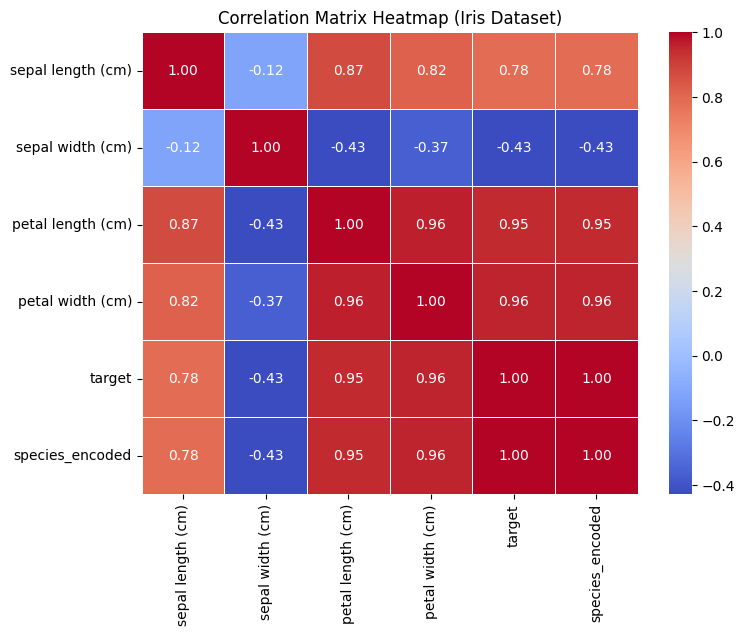

In [8]:
# Calculate and visualize the correlation matrix for numerical features

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for numerical columns
corr_matrix = df.select_dtypes(include='number').corr()

print("Correlation matrix:")
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap (Iris Dataset)')
plt.show()

Question 9: Feature Engineering
<br>
Description: Create a new feature by combining or transforming existing features.

In [9]:
# Create a new feature by combining or transforming existing features

# Example: Create a new feature 'petal area' by multiplying petal length and petal width
df['petal area (cm^2)'] = df['petal length (cm)'] * df['petal width (cm)']

print("First 5 rows with the new 'petal area (cm^2)' feature:")
print(df[['petal length (cm)', 'petal width (cm)', 'petal area (cm^2)']].head())

First 5 rows with the new 'petal area (cm^2)' feature:
   petal length (cm)  petal width (cm)  petal area (cm^2)
0                1.4               0.2               0.28
1                1.4               0.2               0.28
2                1.3               0.2               0.26
3                1.5               0.2               0.30
4                1.4               0.2               0.28


Question 10: Advanced Outlier Detection
<br>
Description: Use the Z-score method to identify and handle outliers.

In [10]:
# Use the Z-score method to identify and handle outliers

import numpy as np

# Select numerical columns
numerical_cols = df.select_dtypes(include='number').columns

# Calculate Z-scores
z_scores = np.abs((df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std())

# Set a threshold for Z-score (commonly 3)
threshold = 3

# Identify outliers: True if any feature's Z-score > threshold
outliers = (z_scores > threshold).any(axis=1)

print("Number of outliers detected (Z-score > 3):", outliers.sum())
print("Indices of outlier rows:", df.index[outliers].tolist())

# Optionally, remove outliers
df_no_outliers = df[~outliers]
print("Shape after removing outliers:", df_no_outliers.shape)

Number of outliers detected (Z-score > 3): 1
Indices of outlier rows: [15]
Shape after removing outliers: (149, 8)
